<a href="https://colab.research.google.com/github/adamazanos/prediksi_saham_lstm/blob/main/Prediksi_Saham_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi saham menggunakan LSTIM
menggunakan guide dari https://thecleverprogrammer.com/2022/01/03/stock-price-prediction-with-lstm/

Untuk sahamnya sendiri saya menggunakan saham Barito Pacific dengan ticker BRPT.JK

# 1. Input data ticker BRPT.JK
Dikarenakan menggunakan library diluar python collab, maka kita install tersendiri yfinance

In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BRPT.JK', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3390,2023-01-02,760.0,765.0,750.0,765.0,765.0,47926800
3391,2023-01-03,765.0,820.0,765.0,810.0,810.0,99089800
3392,2023-01-04,810.0,815.0,790.0,795.0,795.0,45863000
3393,2023-01-05,795.0,805.0,780.0,785.0,785.0,70716600
3394,2023-01-06,785.0,820.0,785.0,820.0,820.0,86324400


In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-01,70.702309,75.681343,64.727463,70.702309,68.973892,1270687831
1,2009-05-04,73.689728,85.639412,72.693916,81.656181,79.659981,1484479231
2,2009-05-05,83.647797,85.639412,75.681343,76.677147,74.802658,983759778
3,2009-05-06,81.656181,81.656181,74.685532,81.656181,79.659981,269053105
4,2009-05-07,83.647797,96.593292,83.647797,92.610062,90.346077,849376326
...,...,...,...,...,...,...,...
3390,2023-01-02,760.000000,765.000000,750.000000,765.000000,765.000000,47926800
3391,2023-01-03,765.000000,820.000000,765.000000,810.000000,810.000000,99089800
3392,2023-01-04,810.000000,815.000000,790.000000,795.000000,795.000000,45863000
3393,2023-01-05,795.000000,805.000000,780.000000,785.000000,785.000000,70716600


# 2. visualisasi data
Untuk kemudahaan visualisasi, menggunakan visualisasi candle stick

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "BRPT Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

# 3. analisa lanjutan
a. pencarian korelasi

In [ ]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999978
High         0.999623
Low          0.999458
Open         0.999087
Volume       0.055243
Name: Close, dtype: float64


#4. Buat model machine learning
dengan menggunakan informasi Open, High, Low, Volume
dan harga Close

kita buat model train dan test 80/20

In [ ]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])
model.fit(xtrain, ytrain, batch_size=1, epochs=15)


Epoch 1/15
2716/2716 [==============================] - 23s 7ms/step - loss: 2413.3293 - accuracy: 0.0000e+00
Epoch 2/15
2716/2716 [==============================] - 20s 7ms/step - loss: 2779.0359 - accuracy: 0.0000e+00
Epoch 3/15
2716/2716 [==============================] - 19s 7ms/step - loss: 2278.2100 - accuracy: 0.0000e+00
Epoch 4/15
2716/2716 [==============================] - 19s 7ms/step - loss: 2300.8696 - accuracy: 0.0000e+00
Epoch 5/15
2716/2716 [==============================] - 19s 7ms/step - loss: 2464.6687 - accuracy: 0.0000e+00
Epoch 6/15
2716/2716 [==============================] - 19s 7ms/step - loss: 2308.2251 - accuracy: 0.0000e+00
Epoch 7/15
2716/2716 [==============================] - 19s 7ms/step - loss: 2028.2888 - accuracy: 0.0000e+00
Epoch 8/15
2716/2716 [==============================] - 20s 8ms/step - loss: 1811.6594 - accuracy: 0.0000e+00
Epoch 9/15
2716/2716 [==============================] - 19s 7ms/step - loss: 2957.8267 - accuracy: 0.0000e+00
Epoch 10/1

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3 , verbose=1)
history = model.fit(xtrain, ytrain, epochs=10, batch_size=10, validation_data=(xtest, ytest), verbose=1, callbacks=[es])

Epoch 1/10
272/272 [==============================] - 7s 16ms/step - loss: 453.5885 - accuracy: 0.0000e+00 - val_loss: 122.9271 - val_accuracy: 0.0000e+00
Epoch 2/10
272/272 [==============================] - 3s 13ms/step - loss: 180.0190 - accuracy: 0.0000e+00 - val_loss: 143.3275 - val_accuracy: 0.0000e+00
Epoch 3/10
272/272 [==============================] - 3s 13ms/step - loss: 160.3036 - accuracy: 0.0000e+00 - val_loss: 238.6019 - val_accuracy: 0.0000e+00
Epoch 4/10
272/272 [==============================] - 3s 13ms/step - loss: 152.6289 - accuracy: 0.0000e+00 - val_loss: 183.3885 - val_accuracy: 0.0000e+00
Epoch 4: early stopping


# Evaluasi model

In [ ]:
from sklearn import metrics

predictions = model.predict(xtest)
ypred = predictions
matrix_test = metrics.classification_report(ytest.argmax(axis=1), ypred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

22/22 [==============================] - 27s 6ms/step
Testing selesai
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       679

    accuracy                           1.00       679
   macro avg       1.00      1.00      1.00       679
weighted avg       1.00      1.00      1.00       679



## Visualisasi LSTM

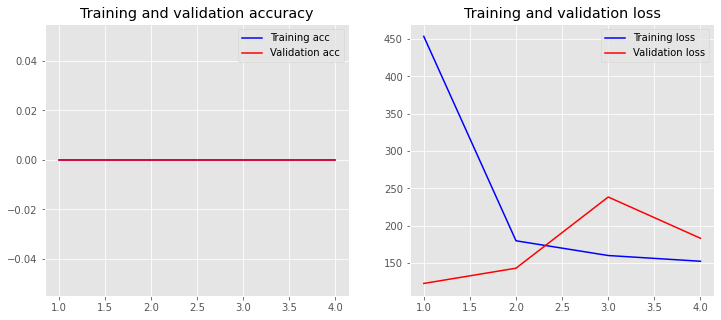

In [ ]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

# Testing

In [ ]:
import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(features)

1/1 [==============================] - 1s 1s/step


array([[161.4936]], dtype=float32)